## **Employee Salary Prediction**

The dataset contains **6,703 records** and **6 features**, which include:

* **Age** – Employee’s age in years
* **Gender** – Male, Female, or Other
* **Education Level** – High School, Bachelor’s, Master’s, or PhD
* **Job Title** – The role or position of the employee
* **Years of Experience** – Total professional experience in years
* **Salary** – Annual salary in USD (target variable)

## **Importing Libraries**

In [99]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import TargetEncoder

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Utility
import joblib
import warnings

warnings.filterwarnings('ignore')

## **Data Loading & Cleaning**

In [100]:
data = pd.read_csv('/content/Salary_Data.csv')
data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [101]:
data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [102]:
data.shape

(6704, 6)

In [103]:
# checking the data types for various columns and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [104]:
# look for duplicate data and remove it
print(f'There are {data.duplicated().sum()} duplicate rows in the data.')

# check for the rows with invalid salaries
invalid_count = len(data[data.Salary <= 0])
print("Invalid salary rows:", invalid_count)

There are 4912 duplicate rows in the data.
Invalid salary rows: 0


In [105]:
# removing duplicates
data = data.drop_duplicates()
print(data.shape)

(1792, 6)


In [106]:
# Checking for null data

data.isnull().sum()

,0
Age,1
Gender,1
Education Level,2
Job Title,1
Years of Experience,2
Salary,4


In [107]:
# removing null values by replcing with median value
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Years of Experience'].fillna(data['Years of Experience'].median(), inplace=True)
data['Salary'].fillna(data['Salary'].median(), inplace=True)

# removing null values by replcing with mode value
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Education Level'].fillna(data['Education Level'].mode()[0], inplace=True)
data['Job Title'].fillna(data['Job Title'].mode()[0], inplace=True)

In [108]:
# analyze numerical columns
data.describe()

,Age,Years of Experience,Salary
count,1792.000000,1792.000000,1792.000000
mean,35.127232,9.151228,113170.193638
std,8.207424,6.836122,51525.624115
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [109]:
# analyze categorical columns
data.describe(include='O')

,Gender,Education Level,Job Title
count,1792,1792,1792
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer Manager
freq,970,510,128


In [110]:
# Checking unique value counts of Job Titles in the data

data['Job Title'].value_counts()

,count
Job Title,
Software Engineer Manager,128
Full Stack Engineer,123
Senior Software Engineer,96
Senior Project Engineer,95
Back end Developer,81
...,...
Junior Social Media Specialist,1
Developer,1
Social M,1


In [111]:
# Replacing Job Tiles with Others whose count<25
job_title_count = data['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

data['Job Title'] = data['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
data['Job Title'].nunique()

17

In [112]:
# Checking unique value counts of Job Titles in the database

data['Job Title'].value_counts()

,count
Job Title,
Others,739
Software Engineer Manager,128
Full Stack Engineer,123
Senior Software Engineer,96
Senior Project Engineer,95
Back end Developer,81
Data Scientist,80
Software Engineer,78
Front end Developer,71


In [113]:
#Checking unique value count of Education Level

data['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,510
Master's Degree,447
PhD,340
Bachelor's,262
Master's,122
High School,110
phD,1


In [114]:
# Combining redundant values of education level

data['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
data['Education Level'].value_counts()

,count
Education Level,
Bachelor's,772
Master's,569
PhD,341
High School,110


In [115]:
# Checking Unique Value count of Gender

data['Gender'].value_counts()

,count
Gender,
Male,970
Female,815
Other,7


## **Exploratory Data Analysis**

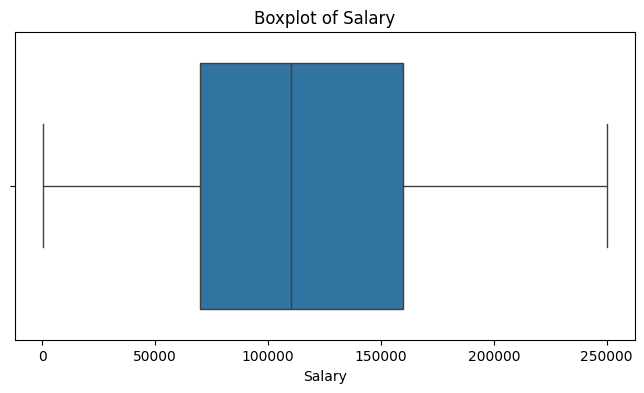

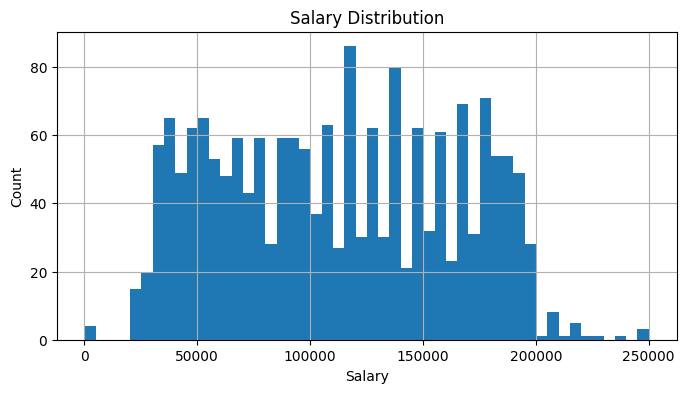

In [116]:
# Boxplot for salary
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Salary'])
plt.title('Boxplot of Salary')
plt.show()

# Salary Distribution
plt.figure(figsize=(8,4))
data['Salary'].hist(bins=50)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

### **Salary Distribution & Outliers**

* **Median:** = \$120 k (center of the box)
* **IQR:** \$75 k–\$160 k covers most salaries
* **Whiskers:** reach from just under \$1 k up to \$250 k
* **Outliers:** a few very low salaries sit just outside the lower whisker, but no extreme spikes
* **Spread:** fairly even between \$20 k and \$200 k


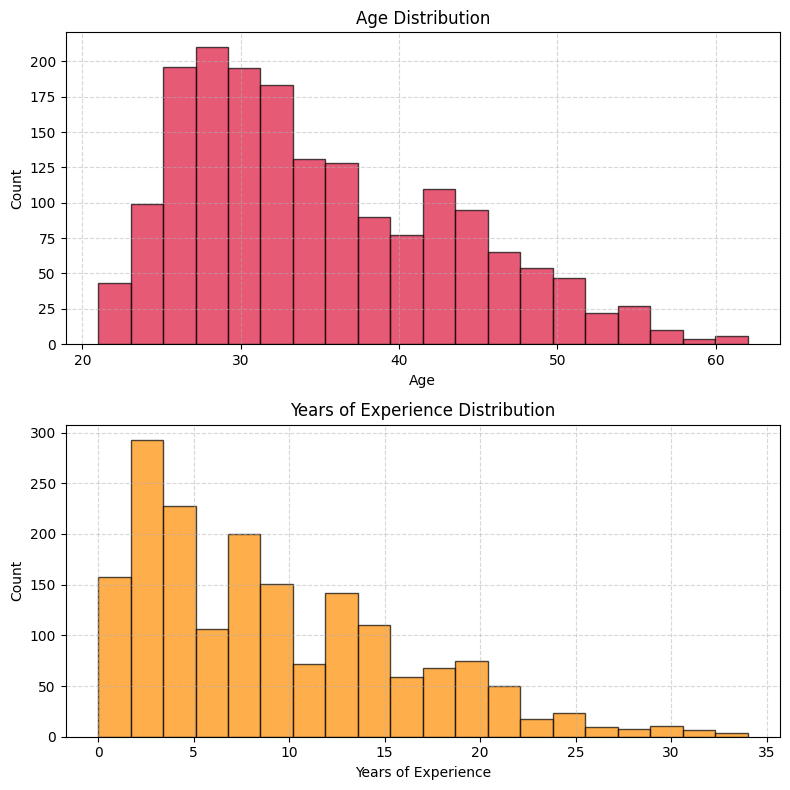

In [117]:
import matplotlib.pyplot as plt

# Create figure and 3 subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Histogram for Age
ax[0].hist(data['Age'].dropna(), bins=20, color='crimson', alpha=0.7, edgecolor='black')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].grid(True, linestyle='--', alpha=0.5)

# Histogram for Years of Experience
ax[1].hist(data['Years of Experience'].dropna(), bins=20, color='darkorange', alpha=0.7, edgecolor='black')
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')
ax[1].set_ylabel('Count')
ax[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


### **Age & Experience**

* **Most employees** are in their **mid‑20s to mid‑30s**, with a peak around **27–30 years old**.
* There’s a **longer tail** out to age **60+**, but far fewer older workers.
* **Experience** clusters heavily between **0–10 years**, especially **2–5 years**.
* A **small group** has **15–30+ years** of experience, appearing as right‑side outliers.
* Both distributions are **right‑skewed** (more younger/less‑experienced people), so we can model them as is without special transforms.


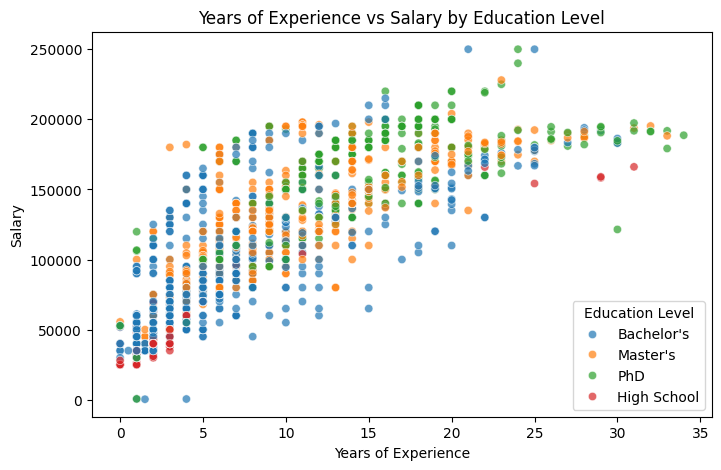

In [150]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Education Level', data=data, alpha=0.7)
plt.title('Years of Experience vs Salary by Education Level')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(title='Education Level')
plt.show()


### **Experience & Salary by Education**

* **Higher degrees earn more:** On average, PhD and Master’s holders sit at the top of the salary range for any given experience level.
* **Bachelor’s overlap:** Bachelor’s salaries overlap with Master’s early on but lag behind as experience grows.
* **High School outliers:** Few data points, but high‑school salaries stay low (<\$70 k) regardless of experience.
* **Experience boost:** Across all education levels, salary climbs with experience—but the climb is steeper for advanced degrees.
* **Key takeaway:** Both **education** and **experience** jointly drive salary—highest pay goes to those with advanced degrees and many years on the job.


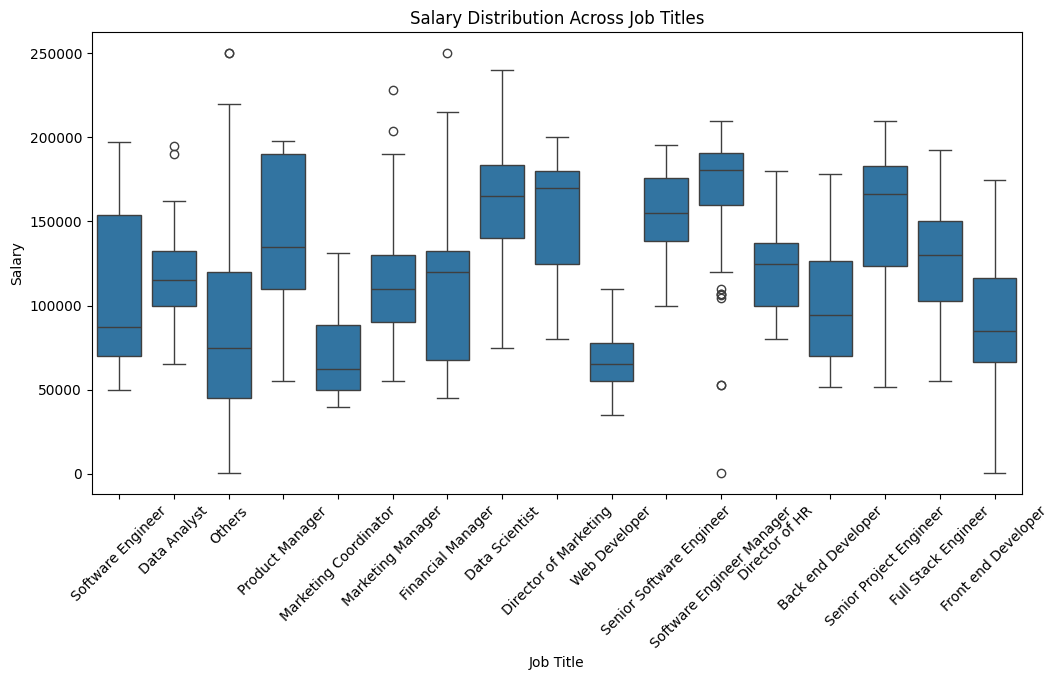

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Title', y='Salary', data=data)
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Job Titles')
plt.show()


### **Salary by Job Title**

* **Highest medians**:

  * **Director of Marketing** and **Senior Project Engineer** sit near \$180 k–\$190 k.
  * **Data Scientist** and **Product Manager** also show strong pay (\$140 k–\$170 k).

* **Mid‑range roles** (median \$100 k–\$130 k):

  * **Software Engineer**, **Full Stack Engineer**, **Financial Manager**, **Back End Developer**.

* **Lower‑pay roles**:

  * **Marketing Coordinator**, **Web Developer**, **Receptionist/Others** cluster around \$50 k–\$80 k.

* **Spread & outliers**:

  * Some roles (e.g., Software Engineer, Data Scientist) have wide boxes/whiskers, showing big pay ranges.
  * A few extreme outliers reach near \$250 k in senior or director positions.

* **Takeaway**:

  * Job title is a **strong salary driver**—senior and director roles consistently earn more and have larger pay variability.


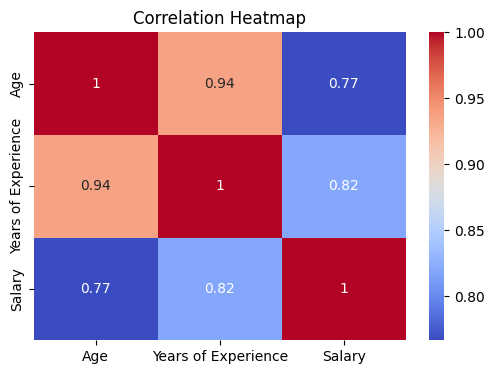

In [120]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **Correlation:**

- **Age and Experience** are strongly correlated (**0.94**) — older people usually have more experience.
- **Experience and Salary** have a strong correlation (**0.82**) — more experience generally means higher pay.
- **Age and Salary** are moderately correlated (**0.77**), but less than experience.

**Experience affects salary more directly than age.**


## **Model Training and Evaluation**

In [121]:
X = data.drop('Salary', axis=1)
y = data['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [122]:
# Target Encoding for categorical variables
encoder = TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

In [123]:
# Scaling for Linear Regression & SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [151]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}


In [152]:
results = []

for name, model in models.items():
    if name in ['Linear Regression', 'Support Vector Regressor']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_encoded, y_train)
        y_pred = model.predict(X_test_encoded)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R² Score': round(r2, 4)
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print("\nModel Performance Summary:")
print(results_df)



Model Performance Summary:
               Model       MAE      RMSE  R² Score
2      Random Forest  10768.36  16144.68    0.8953
3  Gradient Boosting  12240.86  17030.79    0.8835
1      Decision Tree  12540.50  20335.07    0.8339
0  Linear Regression  17672.38  23620.79    0.7759


### **Model Performance:**

* **Random Forest** performed the best with the highest R² score (**0.8953**) and lowest errors (MAE: **10768.36**, RMSE: **16144.68**).
* **Gradient Boosting** also performed well (R²: **0.8835**).
* **Decision Tree** showed moderate performance.
* **Linear Regression** had the weakest results (lowest R²: **0.7759**, highest errors).

**Random Forest is the most accurate model for this task.**


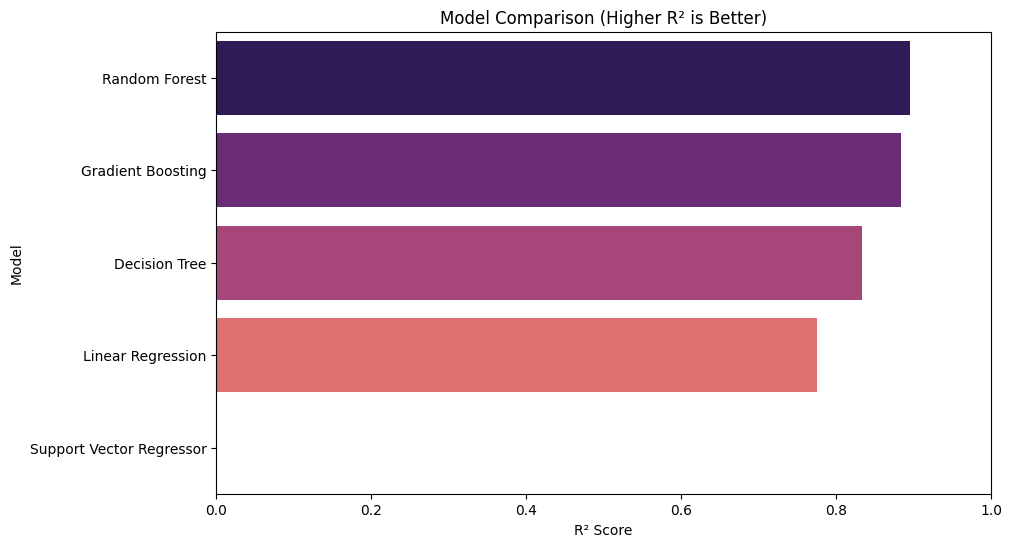

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R² Score', y='Model', data=results_df, palette='magma')
plt.title('Model Comparison (Higher R² is Better)')
plt.xlim(0, 1)
plt.show()


### **XGBoost Training**

In [134]:
from xgboost import XGBRegressor

# XGBoost parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV for XGBoost
xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, objective='reg:squarederror'),
    xgb_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit on encoded data
xgb_grid.fit(X_train_encoded, y_train)

# Best parameters & score
print("\nBest XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost CV R² Score:", round(xgb_grid.best_score_, 4))



Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost CV R² Score: 0.8893


In [136]:
# Predict on test set
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test_encoded)

# Metrics
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

print("\nXGBoost Test Performance:")
print(f"R² Score: {round(xgb_r2, 4)}")
print(f"RMSE: {round(xgb_rmse, 2)}")
print(f"MAE: {round(xgb_mae, 2)}")


XGBoost Test Performance:
R² Score: 0.8993
RMSE: 15831.59
MAE: 11130.85


### **Random Forest Tuning**

In [ ]:

rf_params = {
    'n_estimators': [200, 250, 300, 350, 400],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 5, 6, 10]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train_encoded, y_train)

print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest CV R² Score:", round(rf_grid.best_score_, 4))



Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 250}
Best Random Forest CV R² Score: 0.8864


In [ ]:
# Predict on test set
y_pred_rf = rf_grid.best_estimator_.predict(X_test_encoded)

# Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("\nRandom Forest Test Performance:")
print(f"R² Score: {round(rf_r2, 4)}")
print(f"RMSE: {round(rf_rmse, 2)}")
print(f"MAE: {round(rf_mae, 2)}")



Random Forest Test Performance:
R² Score: 0.903
RMSE: 15536.61
MAE: 10797.9


### **Gradient Boosting Tuning**

In [ ]:
gb_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='r2')
gb_grid.fit(X_train_encoded, y_train)

print("\nBest Gradient Boosting Parameters:", gb_grid.best_params_)
print("Best Gradient Boosting CV R² Score:", round(gb_grid.best_score_, 4))


Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Gradient Boosting CV R² Score: 0.8885


In [ ]:
# Predict on test set
y_pred_gb = gb_grid.best_estimator_.predict(X_test_encoded)

# Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting Test Performance:")
print(f"R² Score: {round(gb_r2, 4)}")
print(f"RMSE: {round(gb_rmse, 2)}")
print(f"MAE: {round(gb_mae, 2)}")



Gradient Boosting Test Performance:
R² Score: 0.9033
RMSE: 15517.45
MAE: 10886.05


### **Ensemble Model Training and Evaluation**

In [143]:
from sklearn.ensemble import StackingRegressor

stack_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42)),
        ('lr', LinearRegression())
    ],
    final_estimator=GradientBoostingRegressor()
)

stack_model.fit(X_train_encoded, y_train)
y_pred_stack = stack_model.predict(X_test_encoded)

# Evaluate
stack_r2 = r2_score(y_test, y_pred_stack)
stack_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
stack_mae = mean_absolute_error(y_test, y_pred_stack)

print("\nStacking Model Performance:")
print(f"R² Score: {round(stack_r2,4)}")
print(f"RMSE: {round(stack_rmse,2)}")
print(f"MAE: {round(stack_mae,2)}")



Stacking Model Performance:
R² Score: 0.8932
RMSE: 16303.5
MAE: 11302.1


### **Visualizing Feature Importance**

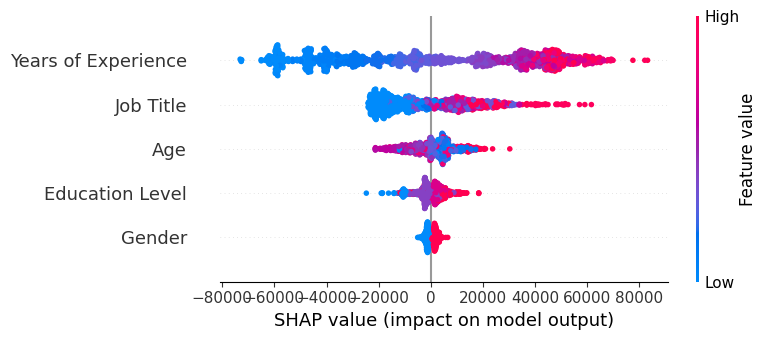

In [156]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(gb, X_train_encoded)

# Calculate SHAP values
shap_values = explainer(X_train_encoded)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_train_encoded)



* **Years of Experience** and **Job Title** have the biggest impact on salary predictions.
* **Age** has moderate influence.
* **Education Level** and **Gender** affect the salary slightly.
* Higher values (red) usually increase salary, while lower values (blue) decrease it.


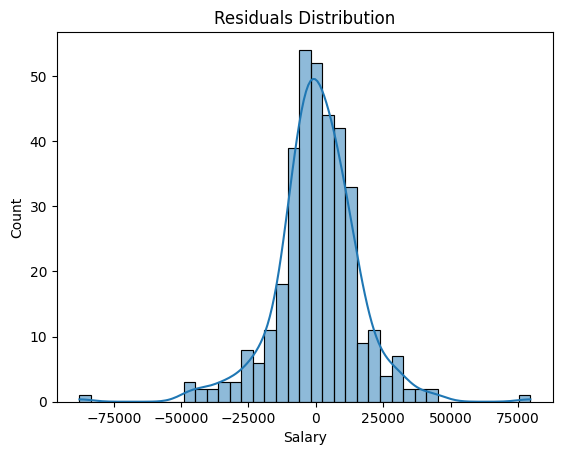

In [157]:
residuals = y_test - y_pred_gb
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()



### **Residual Analysis:**

* The residuals are **centered around 0**, forming a near-symmetric bell curve.
* This indicates that the model makes **unbiased predictions** on average.
* The distribution is **fairly normal**, which is a **good sign** — suggesting that:

  * **Errors are randomly distributed**
  * **No major patterns were missed** by the model
* Slight tails on both ends imply **a few under- and over-predictions**, but nothing extreme.


Our model's residuals look healthy — this supports the reliability and generalizability of the Gradient Boosting model.


### **Saving Best Model**

In [158]:
import joblib

# Save trained model (Gradient Boosting)
joblib.dump(gb, 'salary_predictor_gb.pkl')

# Save target encoder
joblib.dump(encoder, 'target_encoder.pkl')

print("All files saved successfully!")


All files saved successfully!
